# Final Project: Heart Disease Detection
* **Course:** CSCI581-Machine Learning  
* **Professor:** Samuel B Siewert  
* **Author:** Shambhavi Danayak  


### Check if Connected with A100 correctly and working

In [1]:
!nvidia-smi

Fri Dec 13 08:55:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.216.03             Driver Version: 535.216.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          On  | 00000000:03:00.0 Off |                    0 |
| N/A   33C    P0              42W / 300W |      0MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
!pwd

/home/sdanayak/CS581


### Installing Required Libraries

In [5]:
!pip install tensorflow
import tensorflow as tf

Defaulting to user installation because normal site-packages is not writeable


2024-12-12 17:23:52.686608: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 17:23:52.704055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734053032.724424 2877025 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734053032.730527 2877025 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 17:23:52.751261: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [6]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import sklearn

In [8]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [10]:
!pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


## Download Dataset

In [12]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/sdanayak/.kaggle’: File exists


In [14]:
!chmod 600 ~/kaggle.json

In [15]:
!kaggle datasets download -d redwankarimsony/heart-disease-data --force 

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0%|                                               | 0.00/12.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 12.4k/12.4k [00:00<00:00, 20.2MB/s]


In [14]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
^Cplace heart_disease_uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


In [16]:
df = pd.read_csv('./heart_disease_uci.csv')
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


### Data exploration

In [17]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df.shape

(920, 16)

In [20]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### WHAT CAN WE INFER:  

* **Rows(oservations):** 920. 
* **coulumns(features):** 16. 
* **Target Variable:** num (severity of heart disease). 
* **About num:** has all 920 non-null values that means no missing values, data type=integer. 
### Features:  
* **5 Float Columns:** chol, thalch, oldpeak, trestbps, ca. 
* **3 Integers Columns:** id, age, num.  
* **8 Object Columns:** sex, cp, dataset, restecg, slope, thal.  
* **features with missing data:** trestbps(920-861=59), chol(920-890=30), fbs(920-830=90), thalch(920-865=55), exang(920-865=55), oldpeak(920-858=62), slope(920-611=309), ca(920-309=611), thal(920-434=486), restecg(920-918=2).
### POTENTIAL CHALLENGES:

* Class Imbalance num ranges (0-4): Maybe have to use class weights. 
* Handling Missing Data
* Conversion of object-type to numerical?
* how to handle features like chol it is in mg/dl like some Scaler, sex from male/female to 0/1?
* What can we say by now about the Dataset? It is Supervised learning since clear target variable and labeled data.

In [22]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### INFERENCE:

* **Age:**
  Range: 22-77 years. Most patients between47 (25th percentile) and 60(75th percentile) years old.
* **trestbps (Resting blood Pressure):** normal 120/80. Mean: 132.1 mmHg
* **chol:**.
  Mean: 199.1 mg/dL. A significant standard deviation (110.78) suggests a wide range of cholestrol levels.
* **thalch (Maximum heart rate achieved):**.
  Mean: 137.54 bpm. Range: 60 to 202 bpm.
* **oldpeak("ST depression induced by exercise relative to rest" refers to a finding on an electrocardiogram (ECG) where the ST segment appears significantly lower during exercise compared to its level at rest):**. 
    Mean: 0.87 Range has negative values why?
* **ca("Number of major vessels (0-3) colored by fluoroscopy" refers to a medical measurement indicating how many of the major coronary arteries in the heart appear to be significantly narrowed or blocked when visualized using a fluoroscopy procedure, with a possible range of 0 (none) to 3 (all three major vessels) being affected):**. 
Significant missing data.

### PROBLEMS:

* Missing data
* outlier detection for field most dispersed i.e. chol
* Class imbalance in num

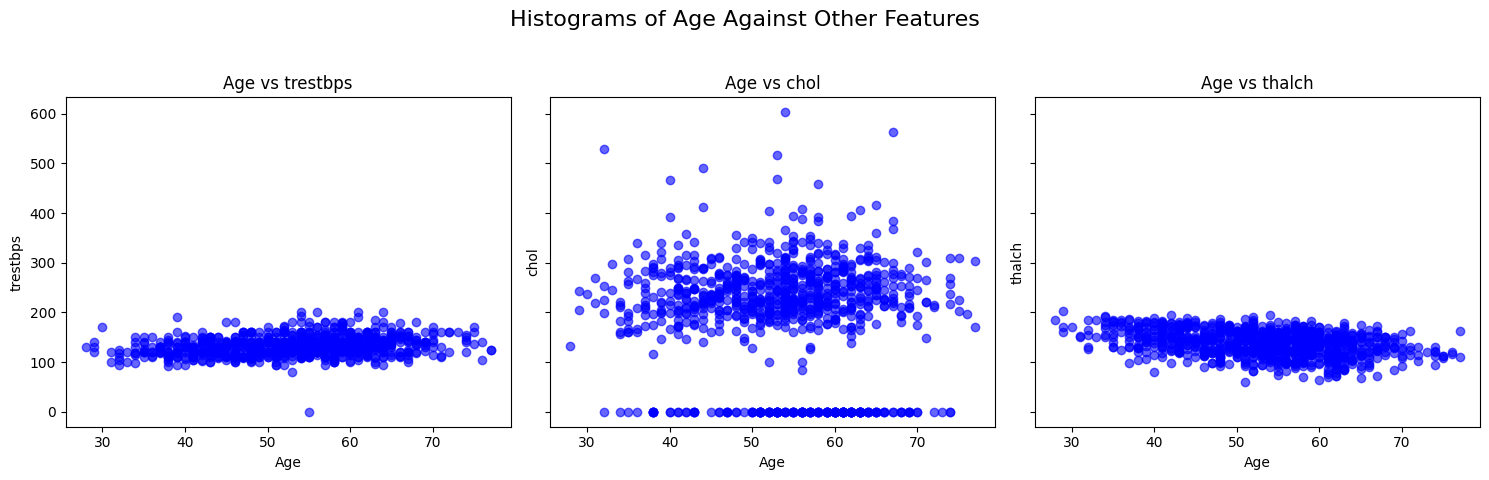

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['trestbps', 'chol', 'thalch']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.suptitle('Histograms of Age Against Other Features', fontsize=16)

for i, feature in enumerate(features):
    axes[i].scatter(df['age'], df[feature], alpha=0.6, color='b')
    axes[i].set_title(f'Age vs {feature}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### INFERENCE:.

* **Age vs Resting Blood Pressure:** outliers exist, does not show significant variation with age but remains within a typical range for most individuals AS IT SHOULDD!  
* **Age vs Cholestrol:** widely distributed as we expected from the std value. No obvious trends and many outliers.
* **Age vs Maximum heart Rate Acieved:** Weak neagtive corelation, younger people tend to have higher rates tha older individuals.

### Feature Analysis:
* Is it of imporatnce to our project goal? i.e. does the given feature and num have any correlation, this can be done by using visualisations, statistical analysis for example: p-test, correlation value etc.
* If no to above question, then should it be dropped from the columns which will result in reduced feature dimention?
* ANN works best with numerical values so object type data need to be turned into int type maybe use one-hot-encoding, or add it as an embedded layer(in case of high cardinal categorical features) etc.
* Missing data/Nan values, this will create the most issue by creating imbalanced model. To resolve this: drop the column, fill with 0 or create a smaller model for predictions etc.

### Starting by handling features of object data types

In [24]:
for column in ['sex', 'cp', 'dataset', 'restecg', 'slope', 'thal']:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in sex: ['Male' 'Female']
Unique values in cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Unique values in dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Unique values in slope: ['downsloping' 'flat' 'upsloping' nan]
Unique values in thal: ['fixed defect' 'normal' 'reversable defect' nan]


### Feature sex can be turned into a binary value 0 for Male and 1 for Female (Binary Encoding)

In [25]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

In [26]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,1,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,0,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,0,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,0,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,0,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


/tmp/ipykernel_2877025/3654145115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='num', data=df, palette='viridis')


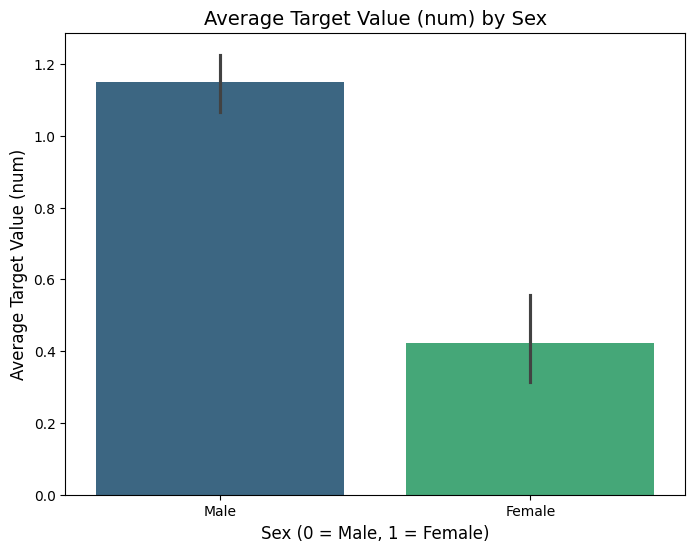

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Sex', fontsize=14)
plt.xlabel('Sex (0 = Male, 1 = Female)', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks([0, 1], ['Male', 'Female']) 
plt.show()

### INFERENCE
* Higher average for males, suggesting on average males have higher severity of heart disease.
* Female have lower average num suggesting on average women are less likely to have severe heart disease compared to males.
* Error bar point here to a problem: men have shorter error bar than women indicating that variability in the mean of "num" value is lower than women wth a larger error bar. This could be because men may have more samples in the data than female.

In [28]:
#Checking count 
stats = df.groupby('sex')['num'].agg(['count'])
print(stats)


     count
sex       
0      726
1      194


### INFERENCE:
* Since males have way more sample than females can influence the model to be biased towards majority class. Model will also not generalize well. What do we do?
* We can add class weights, a higher weight to minority class or ensure a balanced batch of data before feeding it to the model. #HANDLE DURING TRAINING
* EVALUATION on performance also needs to the done for each class using metrics precision, F1 scare, recall etc. 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 115.1+ KB


### Feature cp (Chest Pain Type): 
* has 4 unique values 'typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'.
* We use One-hot-encoding(technique used to convert categorical data into numerical values by creating binary columns for each unique category) since this is categorical with no ordinal relationships. 

In [30]:
print(df['cp'].unique())

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


In [31]:
#count
# Frequency of each category
print(df['cp'].value_counts())

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


In [32]:
print(df.isnull().sum()) 

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### INFERENCE:
* class imbalance can be seen
* there is no specific ranking just different type so we can say data is not categorical.
* No null values so that is good!
* CHECK THE RELATION OF cp type with Target value.

/tmp/ipykernel_2877025/1449141637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='num', data=df, palette='viridis')


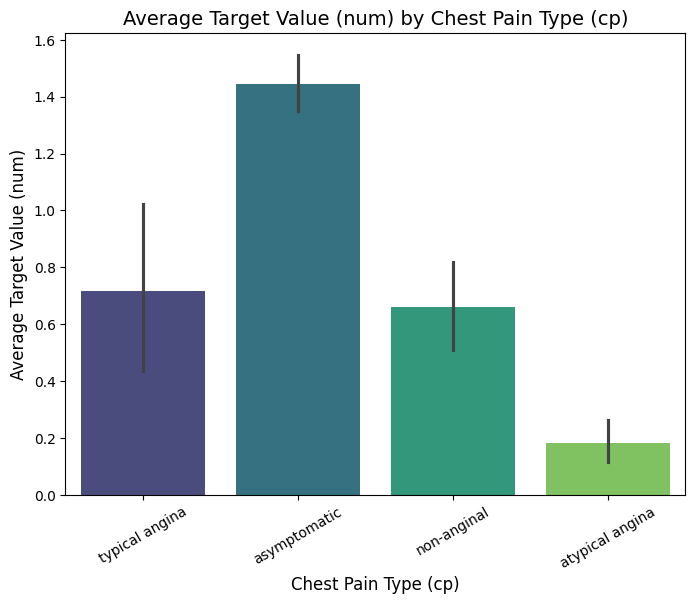

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='cp', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Chest Pain Type (cp)', fontsize=14)
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks(rotation=30)
plt.show()

"Asymptotic" has the highest average num value suggesting that these patients are more likely to have a sever heart disease.

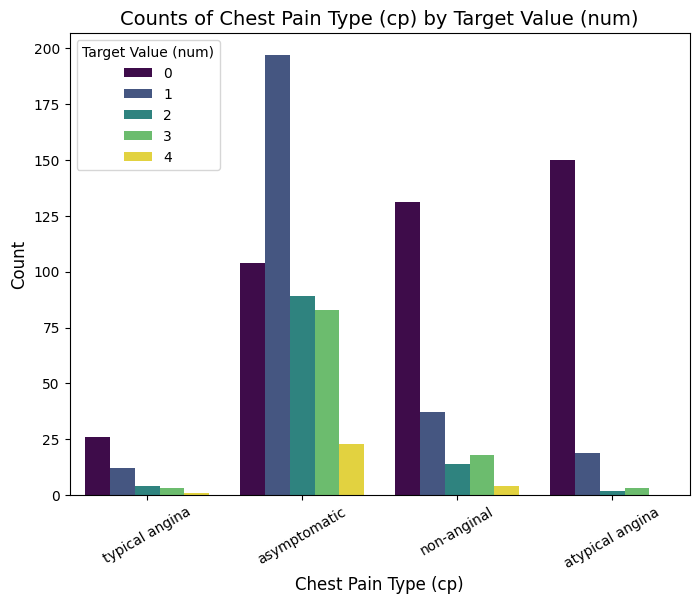

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='num', data=df, palette='viridis')
plt.title('Counts of Chest Pain Type (cp) by Target Value (num)', fontsize=14)
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Target Value (num)')
plt.show()

This graph shows the frequency of each cp type by target value. Clearly asymptotic type is the strongest indicator of heart disease(highest num>0 values).  
We can also see values of typical anigma does not seem to an influential feature but this could be due to the class imbalace (typcal angina have the loest number of sample.) 
OVERALL: A strong indicator for heart disease detection

In [35]:
#modyfying cp data type from object to int; no clear ranking between different cp category; use 0/1 rep
df = pd.get_dummies(df, columns=['cp'], prefix='cp', drop_first=False)
print(df.head())

   id  age  sex    dataset  trestbps   chol    fbs         restecg  thalch  \
0   1   63    0  Cleveland     145.0  233.0   True  lv hypertrophy   150.0   
1   2   67    0  Cleveland     160.0  286.0  False  lv hypertrophy   108.0   
2   3   67    0  Cleveland     120.0  229.0  False  lv hypertrophy   129.0   
3   4   37    0  Cleveland     130.0  250.0  False          normal   187.0   
4   5   41    1  Cleveland     130.0  204.0  False  lv hypertrophy   172.0   

   exang  oldpeak        slope   ca               thal  num  cp_asymptomatic  \
0  False      2.3  downsloping  0.0       fixed defect    0            False   
1   True      1.5         flat  3.0             normal    2             True   
2   True      2.6         flat  2.0  reversable defect    1             True   
3  False      3.5  downsloping  0.0             normal    0            False   
4  False      1.4    upsloping  0.0             normal    0            False   

   cp_atypical angina  cp_non-anginal  cp_typical 

In [36]:
df.head()

,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,0,Cleveland,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,False,False,False,True
1,2,67,0,Cleveland,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,True,False,False,False
2,3,67,0,Cleveland,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,True,False,False,False
3,4,37,0,Cleveland,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,False,False,True,False
4,5,41,1,Cleveland,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,False,True,False,False


In [37]:
#convert bool true/false to 0/1 format
df[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']] = \
    df[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']].astype(int)
df.head()


,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,0,Cleveland,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,0,0,1
1,2,67,0,Cleveland,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,0,0,0
2,3,67,0,Cleveland,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,0,0,0
3,4,37,0,Cleveland,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,0,1,0
4,5,41,1,Cleveland,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  920 non-null    int64  
 1   age                 920 non-null    int64  
 2   sex                 920 non-null    int64  
 3   dataset             920 non-null    object 
 4   trestbps            861 non-null    float64
 5   chol                890 non-null    float64
 6   fbs                 830 non-null    object 
 7   restecg             918 non-null    object 
 8   thalch              865 non-null    float64
 9   exang               865 non-null    object 
 10  oldpeak             858 non-null    float64
 11  slope               611 non-null    object 
 12  ca                  309 non-null    float64
 13  thal                434 non-null    object 
 14  num                 920 non-null    int64  
 15  cp_asymptomatic     920 non-null    int64  
 16  cp_atypi

### Feature dataset
* no null values!

In [39]:
print(df['dataset'].unique())

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


In [40]:
print(df['dataset'].value_counts())

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


/tmp/ipykernel_2877025/2146831334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dataset', y='num', data=df, palette='viridis')


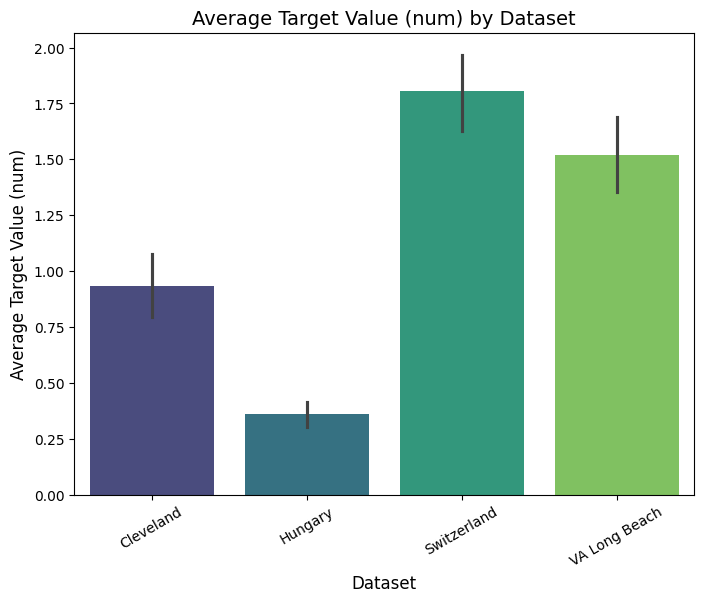

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='dataset', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Dataset', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks(rotation=30)
plt.show()

Since this feature only gives information on where the study was conducted and we are intereseted in predicting num value for a given patient we can drop this column.  
Removing unnecessary coulmns and prevent model from over-fitting

In [42]:
df = df.drop(columns=['dataset'])
df.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,0,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,0,0,1
1,2,67,0,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,0,0,0
2,3,67,0,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,0,0,0
3,4,37,0,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,0,1,0
4,5,41,1,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,1,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  920 non-null    int64  
 1   age                 920 non-null    int64  
 2   sex                 920 non-null    int64  
 3   trestbps            861 non-null    float64
 4   chol                890 non-null    float64
 5   fbs                 830 non-null    object 
 6   restecg             918 non-null    object 
 7   thalch              865 non-null    float64
 8   exang               865 non-null    object 
 9   oldpeak             858 non-null    float64
 10  slope               611 non-null    object 
 11  ca                  309 non-null    float64
 12  thal                434 non-null    object 
 13  num                 920 non-null    int64  
 14  cp_asymptomatic     920 non-null    int64  
 15  cp_atypical angina  920 non-null    int64  
 16  cp_non-a

### Feature: "fbs" if fasting blood sugar > 120 mg/dl
* has missing values (920-830= 90)
* A little about fbs:
  * The fasting blood sugar (FBS) feature, measured in milligrams per deciliter (mg/dL), is a commonly used parameter in medical diagnostics.
  * An FBS level greater than 120 mg/dL suggests elevated blood sugar levels, which may indicate diabetes or pre-diabetes. Which altogether contributes to cardio issue.

In [44]:
print(df['fbs'].unique())

[True False nan]


/tmp/ipykernel_2877025/973446669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fbs', y='num', data=df, palette='viridis')


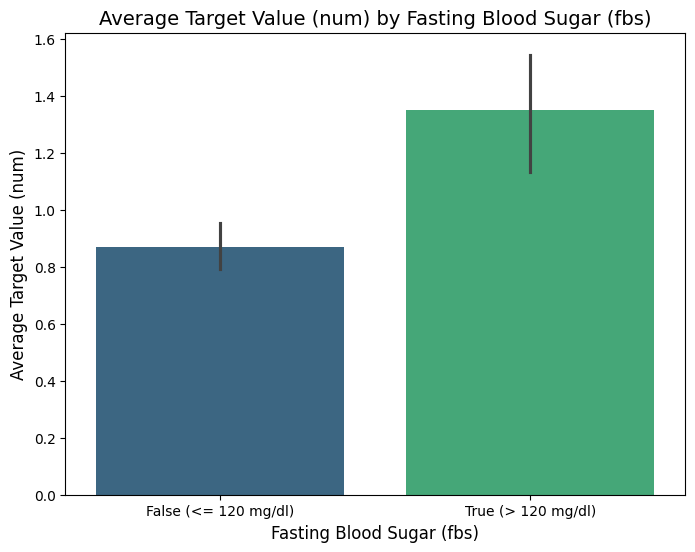

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='fbs', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Fasting Blood Sugar (fbs)', fontsize=14)
plt.xlabel('Fasting Blood Sugar (fbs)', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['False (<= 120 mg/dl)', 'True (> 120 mg/dl)'])
plt.show()


### INFERENCE:
* patients with True fbs value have slightly higher average num value.

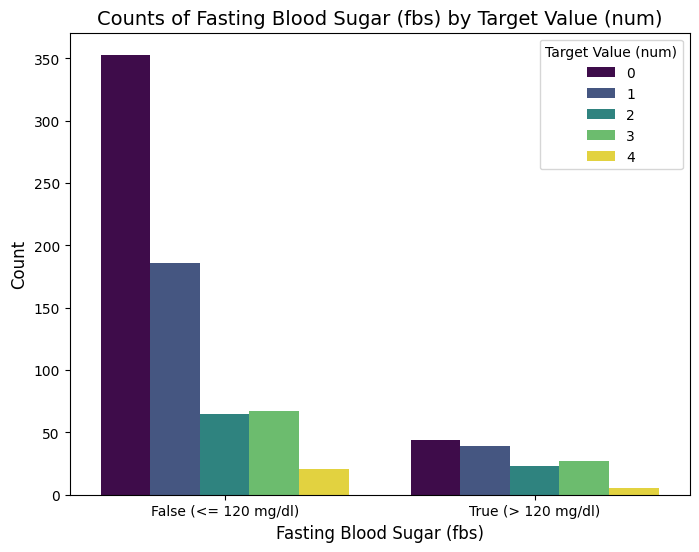

In [46]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='num', data=df, palette='viridis')
plt.title('Counts of Fasting Blood Sugar (fbs) by Target Value (num)', fontsize=14)
plt.xlabel('Fasting Blood Sugar (fbs)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['False (<= 120 mg/dl)', 'True (> 120 mg/dl)'])
plt.legend(title='Target Value (num)')
plt.show()


### INFERENCE:
* Majority of num=0 falls under false fbs category

In [47]:
print(df['fbs'].value_counts())

fbs
False    692
True     138
Name: count, dtype: int64


In [48]:
#fill the missing values with false as majority of samples fall in that category
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
print(df['fbs'].isnull().sum())

0


/tmp/ipykernel_2877025/3523975304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
/tmp/ipykernel_2877025/3523975304.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)


In [49]:
#binary format conversion
df['fbs'] = df['fbs'].astype(int)

In [50]:
df.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,0,145.0,233.0,1,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,0,0,1
1,2,67,0,160.0,286.0,0,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,0,0,0
2,3,67,0,120.0,229.0,0,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,0,0,0
3,4,37,0,130.0,250.0,0,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,0,1,0
4,5,41,1,130.0,204.0,0,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,1,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  920 non-null    int64  
 1   age                 920 non-null    int64  
 2   sex                 920 non-null    int64  
 3   trestbps            861 non-null    float64
 4   chol                890 non-null    float64
 5   fbs                 920 non-null    int64  
 6   restecg             918 non-null    object 
 7   thalch              865 non-null    float64
 8   exang               865 non-null    object 
 9   oldpeak             858 non-null    float64
 10  slope               611 non-null    object 
 11  ca                  309 non-null    float64
 12  thal                434 non-null    object 
 13  num                 920 non-null    int64  
 14  cp_asymptomatic     920 non-null    int64  
 15  cp_atypical angina  920 non-null    int64  
 16  cp_non-a

### Feature "restecg" (resting electrocardiographic results aka ECG):
* missing values(920- 918= 2)
* About restcg:
  *  essential diagnostic tool for understanding the electrical activity of the heart and can provide critical insights into heart health.
  *  Abnormalities such as arrhythmias, ischemia, hypertrophy, or conduction delays can point to various forms of heart disease, necessitating further investigation and management.

In [52]:
print(df['restecg'].unique())

['lv hypertrophy' 'normal' 'st-t abnormality' nan]


In [53]:
print(df['restecg'].value_counts())

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


/tmp/ipykernel_2877025/2481368224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='restecg', y='num', data=df, palette='viridis')


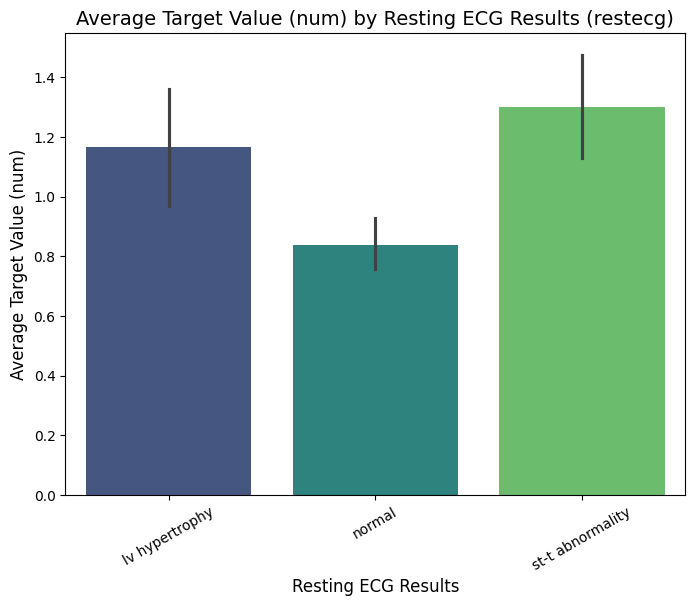

In [54]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='restecg', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Resting ECG Results (restecg)', fontsize=14)
plt.xlabel('Resting ECG Results', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks(rotation=30)
plt.show()

### INFERENCE
* st-- abnormality category patients have highest average num values indicating more severe heat disease.
* normal category has the lowest values indicating least likelihood of heart disease.
* lv hypertrophy has moderate values.
* no apparent relationship between categories can be seen.

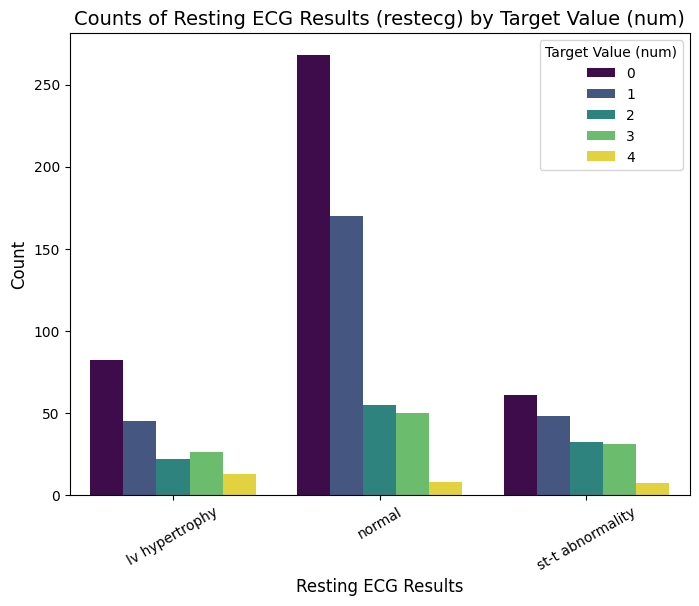

In [55]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='num', data=df, palette='viridis')
plt.title('Counts of Resting ECG Results (restecg) by Target Value (num)', fontsize=14)
plt.xlabel('Resting ECG Results', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target Value (num)')
plt.xticks(rotation=30)
plt.show()

### INFERENCE
* for num=0 majority fall into category of normal. As expected from real world clinical observations
* higher num values have a stronger representtaion in the remaining 2 categories


In [56]:
#we can fill the missing values only 2 as normal category
# df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
# Fill missing values in 'restecg' with the mode (most frequent value)
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  920 non-null    int64  
 1   age                 920 non-null    int64  
 2   sex                 920 non-null    int64  
 3   trestbps            861 non-null    float64
 4   chol                890 non-null    float64
 5   fbs                 920 non-null    int64  
 6   restecg             920 non-null    object 
 7   thalch              865 non-null    float64
 8   exang               865 non-null    object 
 9   oldpeak             858 non-null    float64
 10  slope               611 non-null    object 
 11  ca                  309 non-null    float64
 12  thal                434 non-null    object 
 13  num                 920 non-null    int64  
 14  cp_asymptomatic     920 non-null    int64  
 15  cp_atypical angina  920 non-null    int64  
 16  cp_non-a

In [58]:
# now convert to binary
df = pd.get_dummies(df, columns=['restecg'], prefix='restecg', drop_first=False)

In [59]:
# Convert True/False to 1/0 for one-hot encoded columns
df[['restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']] = (
    df[['restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']].astype(int)
)
df.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,1,63,0,145.0,233.0,1,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,0,0,1,1,0,0
1,2,67,0,160.0,286.0,0,108.0,True,1.5,flat,3.0,normal,2,1,0,0,0,1,0,0
2,3,67,0,120.0,229.0,0,129.0,True,2.6,flat,2.0,reversable defect,1,1,0,0,0,1,0,0
3,4,37,0,130.0,250.0,0,187.0,False,3.5,downsloping,0.0,normal,0,0,0,1,0,0,1,0
4,5,41,1,130.0,204.0,0,172.0,False,1.4,upsloping,0.0,normal,0,0,1,0,0,1,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     865 non-null    object 
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feature "exang" exercise-induced angina (True/ False):
* has missing values 920-865= 55
* about exang:
  * represented as a binary feature (True/False) in heart disease diagnostics, is a crucial indicator of how the heart responds to physical stress.
  * In real-world True value is a strong indicator for underlying coronary artery disease. 

In [61]:
print(df['exang'].unique())

[False True nan]


In [62]:
print(df['exang'].value_counts())

exang
False    528
True     337
Name: count, dtype: int64


/tmp/ipykernel_2877025/2845118523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='exang', y='num', data=df, palette='viridis')


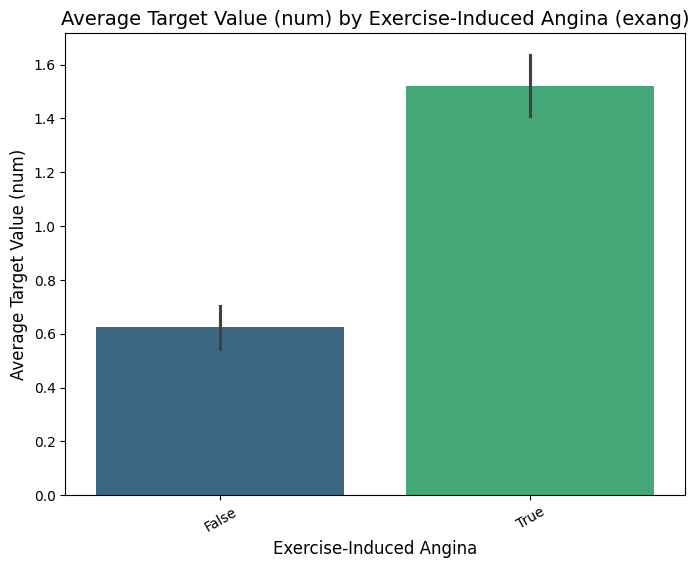

In [63]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='exang', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Exercise-Induced Angina (exang)', fontsize=14)
plt.xlabel('Exercise-Induced Angina', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks([0, 1], ['False', 'True'], rotation=30)
plt.show()

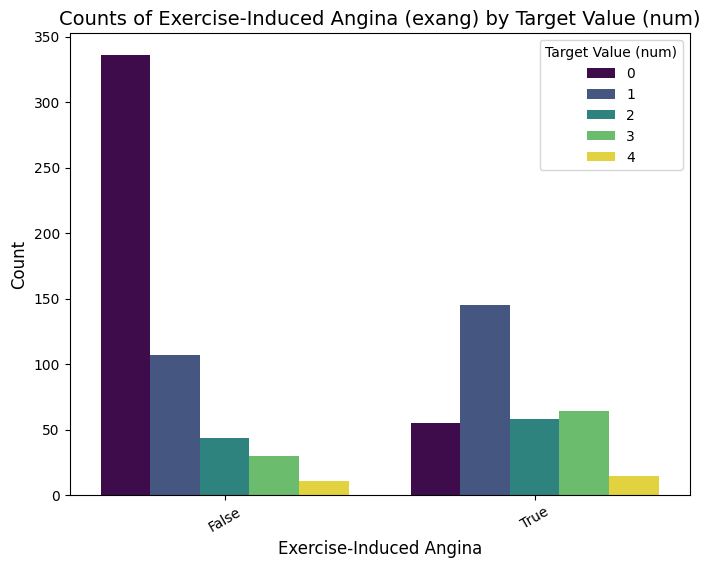

In [64]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='num', data=df, palette='viridis')
plt.title('Counts of Exercise-Induced Angina (exang) by Target Value (num)', fontsize=14)
plt.xlabel('Exercise-Induced Angina', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['False', 'True'], rotation=30)
plt.legend(title='Target Value (num)')
plt.show()

### INFERENCE:
* False value patients have less likelihood of a heart disease
* results align with real-world observation that people with health heart tend to not have exercise induced heart problems.
* imbalance is needed for the accuracy of the model.

In [65]:
#fill the missing values (55)
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

/tmp/ipykernel_2877025/2320555589.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


In [66]:
#convert to binary format
df['exang'] = df['exang'].astype(int)

In [67]:
df.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,1,63,0,145.0,233.0,1,150.0,0,2.3,downsloping,0.0,fixed defect,0,0,0,0,1,1,0,0
1,2,67,0,160.0,286.0,0,108.0,1,1.5,flat,3.0,normal,2,1,0,0,0,1,0,0
2,3,67,0,120.0,229.0,0,129.0,1,2.6,flat,2.0,reversable defect,1,1,0,0,0,1,0,0
3,4,37,0,130.0,250.0,0,187.0,0,3.5,downsloping,0.0,normal,0,0,0,1,0,0,1,0
4,5,41,1,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,0,0,1,0,0,1,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feature "thal" [normal; fixed defect; reversible defect]:
* missing values a lot of them 920-434=486
* About thal:
  * short for thalassemia
  * categorical variable commonly used in heart disease detection

In [69]:
print(df['thal'].unique())

['fixed defect' 'normal' 'reversable defect' nan]


In [70]:
print(df['thal'].value_counts())

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [71]:
print(df['thal'].dtype)

object


In [72]:
print(df['thal'].isnull().sum())

486


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

/tmp/ipykernel_2877025/3780689622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='thal', y='num', data=df, palette='viridis')


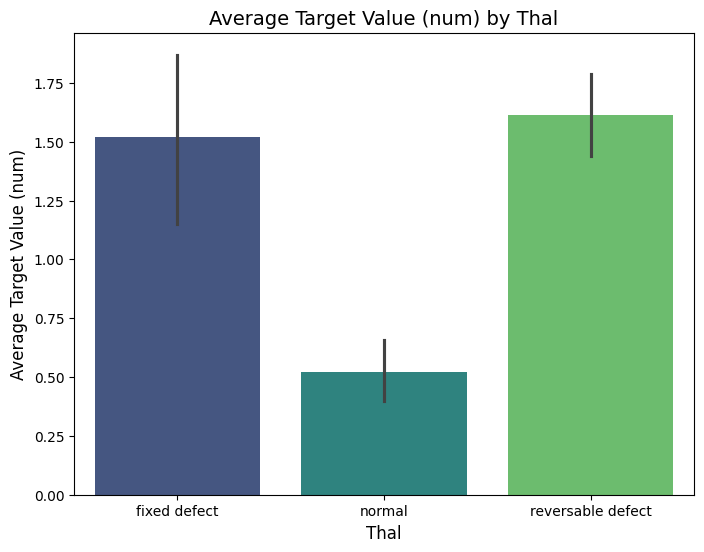

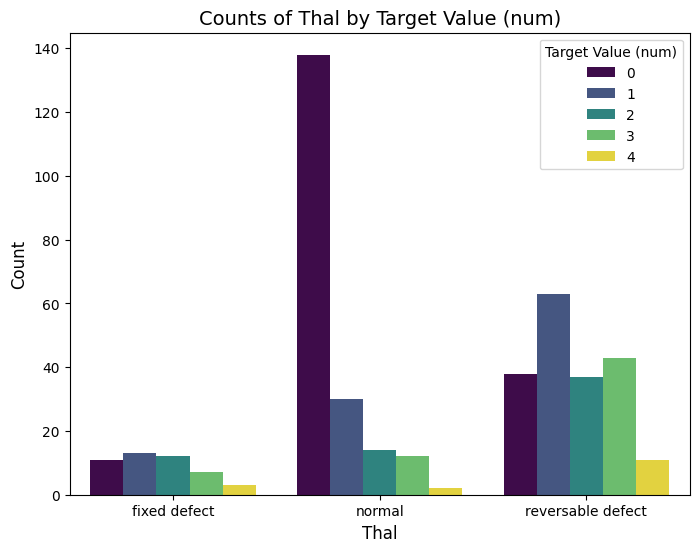

/tmp/ipykernel_2877025/3780689622.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='thal', y='num', data=df, palette='viridis')


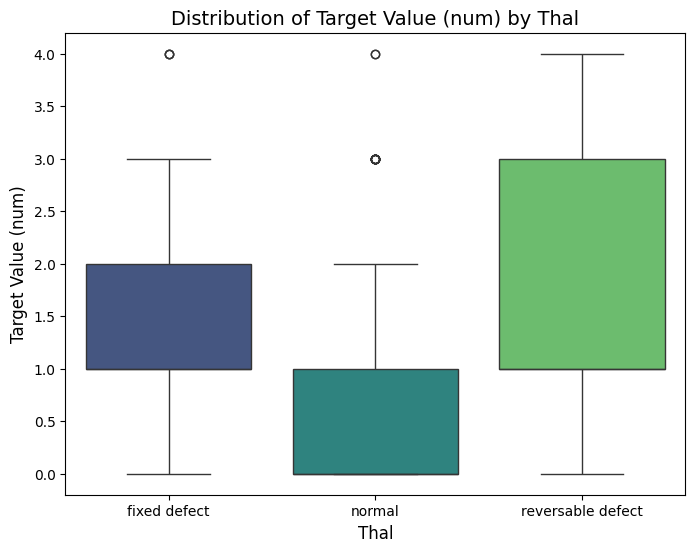

In [74]:
# Bar plot to show the average target value (num) for each thal category
plt.figure(figsize=(8, 6))
sns.barplot(x='thal', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Thal', fontsize=14)
plt.xlabel('Thal', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Count plot to show the distribution of num for each thal category
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='num', data=df, palette='viridis')
plt.title('Counts of Thal by Target Value (num)', fontsize=14)
plt.xlabel('Thal', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Target Value (num)', fontsize=10)
plt.show()

# Box plot to show the distribution of num by thal
plt.figure(figsize=(8, 6))
sns.boxplot(x='thal', y='num', data=df, palette='viridis')
plt.title('Distribution of Target Value (num) by Thal', fontsize=14)
plt.xlabel('Thal', fontsize=12)
plt.ylabel('Target Value (num)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### INFERENCE
* thal is a strong indicator of heart disease.
* To handle missing values 2 ways to do:
  * create a separte ml to predict values
  * imput as "unkown"

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feature "slope"
* missing values 920-611=309
* About:
    * The slope of the peak exercise ST segment is a critical feature in diagnosing heart disease, particularly in identifying myocardial ischemia or other abnormalities in heart function during stress.

In [76]:
print(df['slope'].unique())

['downsloping' 'flat' 'upsloping' nan]


In [77]:
print(df['slope'].value_counts())

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


/tmp/ipykernel_2877025/4140016111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='slope', y='num', data=df, palette='viridis')


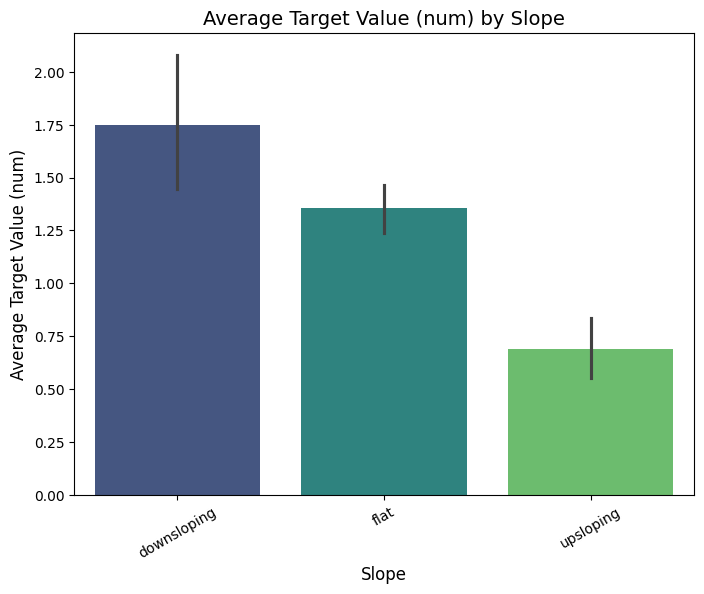

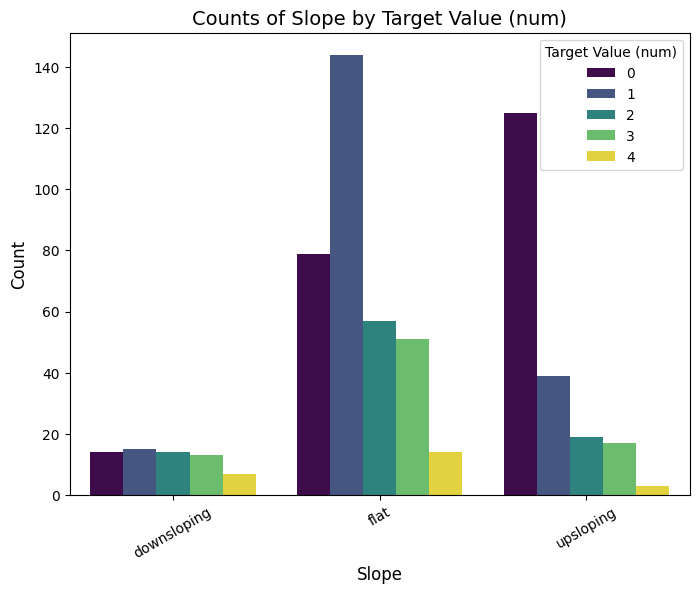

/tmp/ipykernel_2877025/4140016111.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='slope', y='num', data=df, palette='viridis')


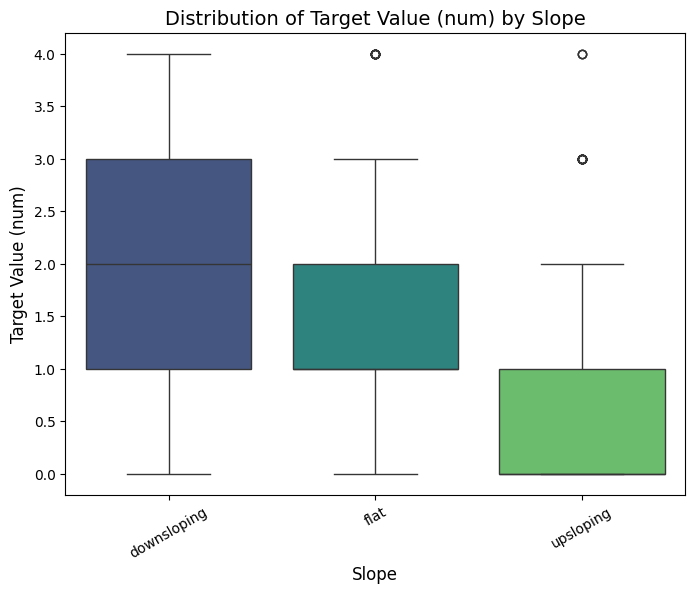

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x='slope', y='num', data=df, palette='viridis')
plt.title('Average Target Value (num) by Slope', fontsize=14)
plt.xlabel('Slope', fontsize=12)
plt.ylabel('Average Target Value (num)', fontsize=12)
plt.xticks(rotation=30)
plt.show()

# Count plot for slope by num
plt.figure(figsize=(8, 6))
sns.countplot(x='slope', hue='num', data=df, palette='viridis')
plt.title('Counts of Slope by Target Value (num)', fontsize=14)
plt.xlabel('Slope', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Target Value (num)')
plt.show()

# Box plot to visualize distribution of num by slope
plt.figure(figsize=(8, 6))
sns.boxplot(x='slope', y='num', data=df, palette='viridis')
plt.title('Distribution of Target Value (num) by Slope', fontsize=14)
plt.xlabel('Slope', fontsize=12)
plt.ylabel('Target Value (num)', fontsize=12)
plt.xticks(rotation=30)
plt.show()

### INFERENCE
* From bar plot it is clear downsloping has the highest average num followed by flat then unsloping
* count plot suggests, patients with flat slope have a target num value of 0 indicating less severity of heart disease.
* downsloping had high proporation of higher num values suggesting severe heart disease condition.  

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Remaining feature exploration

**id**: id (Unique id for each patient), no missing values. 
* Since id not a unique feature relevant toour model we can drop this column and prevent risk of overfitting

**age:** Age of the patient in years, no missing values. 

In [80]:
print(df['age'].dtype)

int64


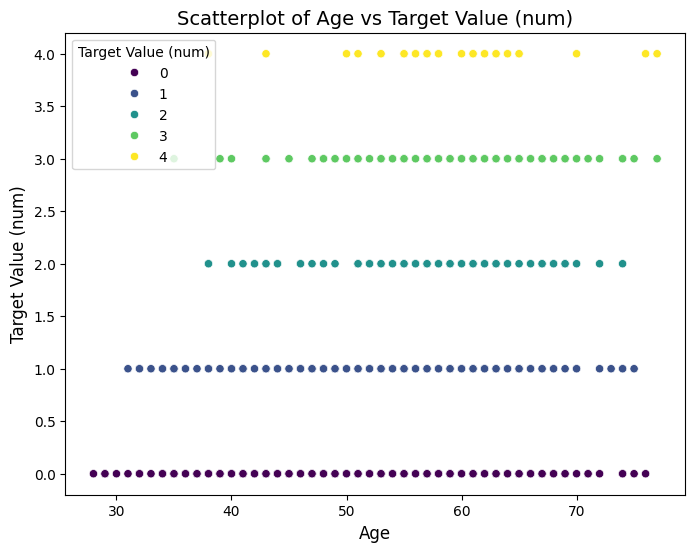

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='num', data=df, hue='num', palette='viridis')
plt.title('Scatterplot of Age vs Target Value (num)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Target Value (num)', fontsize=12)
plt.legend(title='Target Value (num)')
plt.show()

/tmp/ipykernel_2877025/3642598565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='age', data=df, palette='viridis')


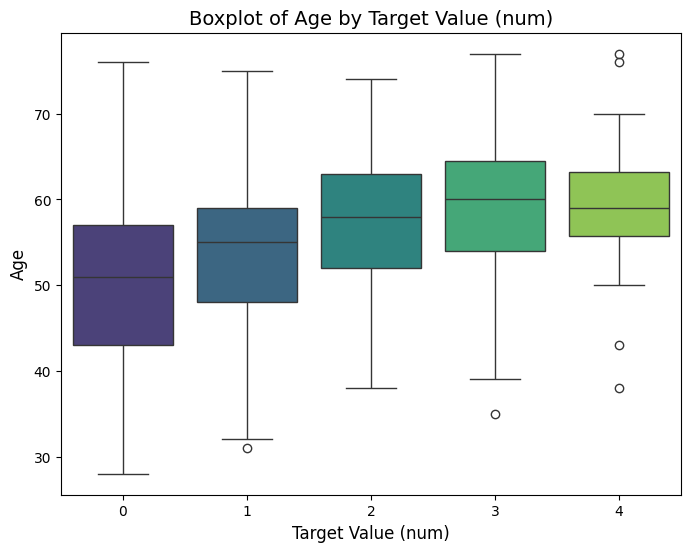

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='age', data=df, palette='viridis')
plt.title('Boxplot of Age by Target Value (num)', fontsize=14)
plt.xlabel('Target Value (num)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

### INFERENCE
* Clearly a strong feature for the model

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feature "trestbps" resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)):
* Missing values 920-861=59
* About:
  * a key feature in detecting and assessing heart disease.
  *  it reflects the pressure exerted by blood on the walls of arteries during the resting phase of the heart.
    

In [84]:
print(df['trestbps'].dtype)

float64


In [85]:
print(df['trestbps'].unique())

[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127.]


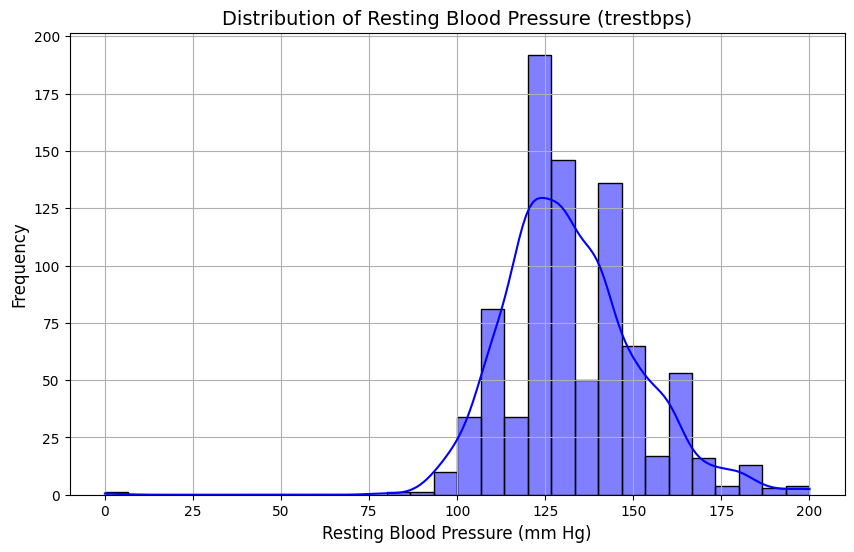

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trestbps'], bins=30, kde=True, color='blue')
plt.title('Distribution of Resting Blood Pressure (trestbps)', fontsize=14)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

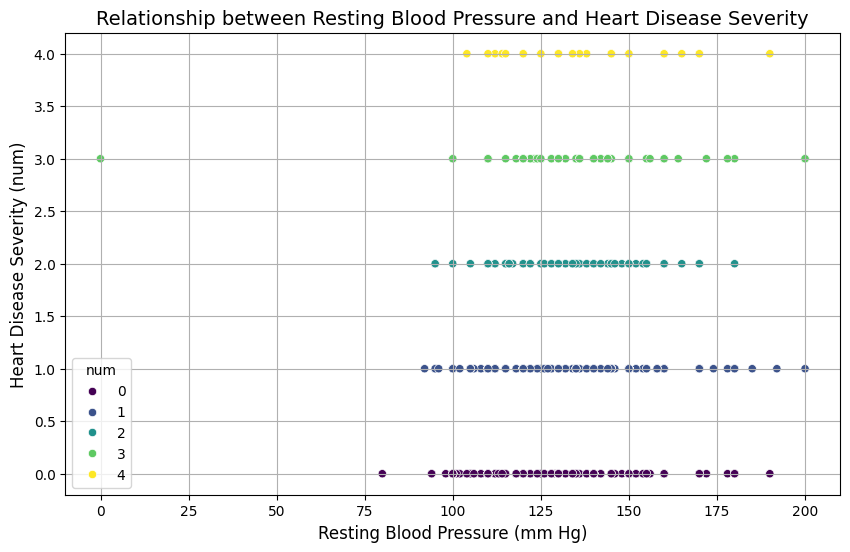

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trestbps'], y=df['num'], hue=df['num'], palette='viridis')
plt.title('Relationship between Resting Blood Pressure and Heart Disease Severity', fontsize=14)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Heart Disease Severity (num)', fontsize=12)
plt.grid(True)
plt.show()

### INFERENCE
* clearly a weak relationship with target variable directly but along with other features can have an impact on the target variable prediction.

In [88]:
print(df['trestbps'].isnull().sum())

59


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

trestbps relationship with cp

/tmp/ipykernel_2877025/484248324.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Chest Pain Type', y='trestbps', data=df_present, palette='Set3')


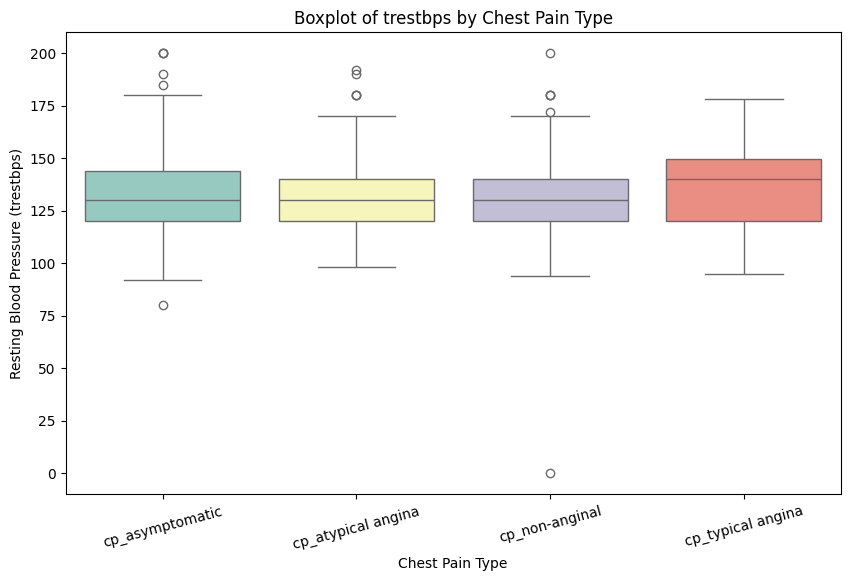

In [90]:
# Reshape one-hot encoded columns for visualization
cp_cols = ['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
df_melted = df.melt(id_vars=['trestbps'], value_vars=cp_cols, 
                    var_name='Chest Pain Type', value_name='Presence')

# Filter for rows where the chest pain type is present
df_present = df_melted[df_melted['Presence'] == 1]

# Boxplot of trestbps for different chest pain types
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Chest Pain Type', y='trestbps', data=df_present, palette='Set3')
plt.title('Boxplot of trestbps by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.xticks(rotation=15)
plt.show()

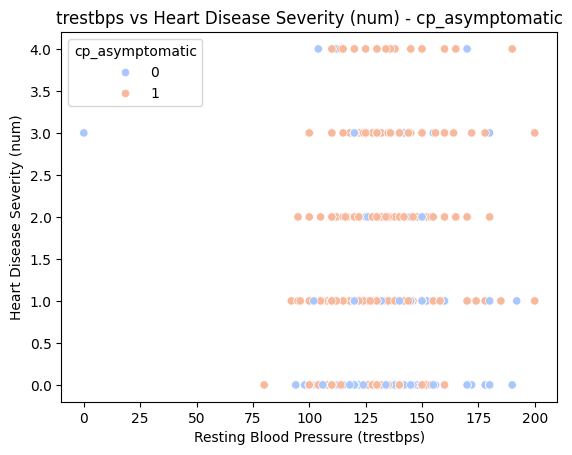

In [91]:
# Scatterplot for trestbps vs num, hue by cp_asymptomatic
sns.scatterplot(x='trestbps', y='num', hue='cp_asymptomatic', data=df, palette='coolwarm')
plt.title('trestbps vs Heart Disease Severity (num) - cp_asymptomatic')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Heart Disease Severity (num)')
plt.show()


trestbps relationship with thalch

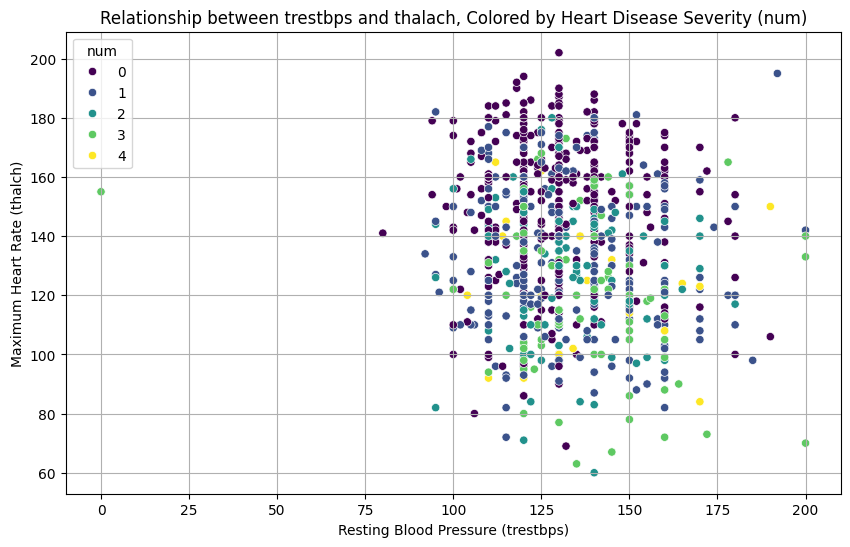

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for trestbps vs thalach
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='thalch', hue='num', data=df, palette='viridis')
plt.title('Relationship between trestbps and thalach, Colored by Heart Disease Severity (num)')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Maximum Heart Rate (thalch)')
plt.grid(True)
plt.show()

In [93]:
correlation = df[['trestbps', 'thalch']].corr()
print(correlation)

          trestbps    thalch
trestbps  1.000000 -0.104899
thalch   -0.104899  1.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feature "oldpeak" ST depression induced by exercise relative to rest:
* has missing values 920-858=62
* About:
  *  It reflects changes in the heart's electrical activity under physical stress and provides insights into myocardial blood supply.
  *  Higher values typically indicate a greater risk of heart disease and necessitate further diagnostic testing and potential interventions.

In [95]:
print(df['oldpeak'].dtype)

float64


In [96]:
print(df['oldpeak'].isnull().sum())

62


/tmp/ipykernel_2877025/3773680240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='oldpeak', data=df, palette='Set3')


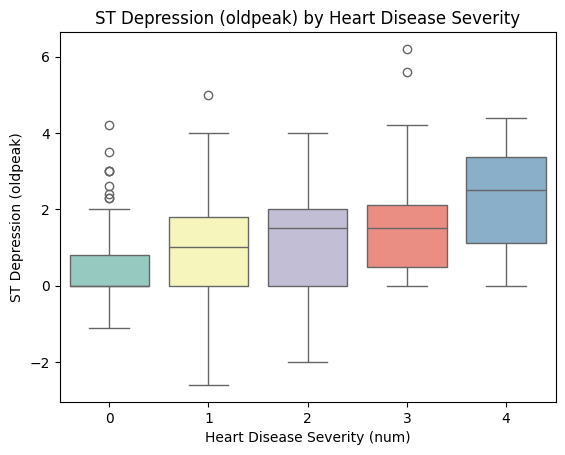

In [97]:
sns.boxplot(x='num', y='oldpeak', data=df, palette='Set3')
plt.title('ST Depression (oldpeak) by Heart Disease Severity')
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('ST Depression (oldpeak)')
plt.show()

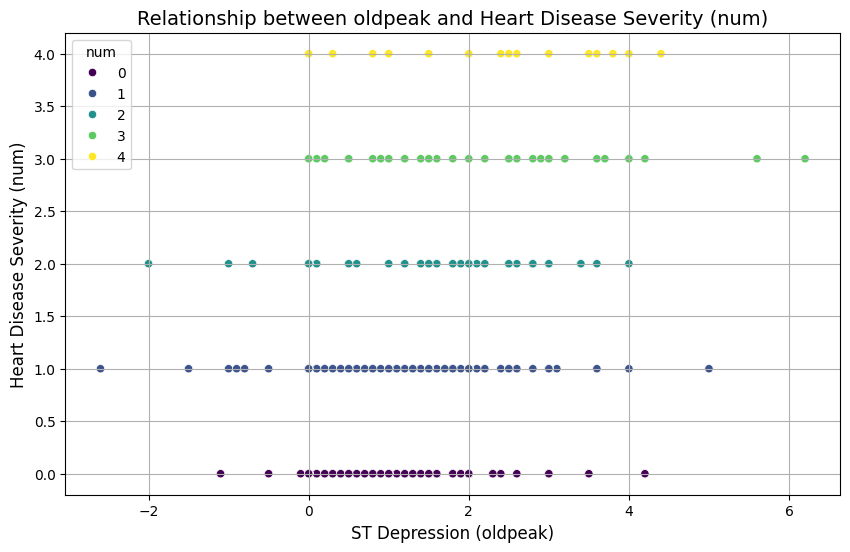

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldpeak', y='num', hue='num', data=df, palette='viridis')
plt.title('Relationship between oldpeak and Heart Disease Severity (num)', fontsize=14)
plt.xlabel('ST Depression (oldpeak)', fontsize=12)
plt.ylabel('Heart Disease Severity (num)', fontsize=12)
plt.grid(True)
plt.show()

In [99]:
correlation = df[['oldpeak', 'num']].corr()
print(correlation)

          oldpeak       num
oldpeak  1.000000  0.443084
num      0.443084  1.000000


### INFERENCE
* Strong relationship with num, an increasing trend and positive correlation value.
* Higher oldpeak values typically correspond to more severe heart disease, making it a valuable feature for the model.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feautre "ca" number of major vessels (0-3) colored by fluoroscopy:
* missing values 920-309=611
* About:
  * essential indicator of coronary artery health
  * It provides critical information about the extent of blood flow restriction or blockage, which is highly relevant to detecting heart disease.

In [101]:
print(df['ca'].dtype)

float64


In [102]:
print(df['ca'].isnull().sum())

611


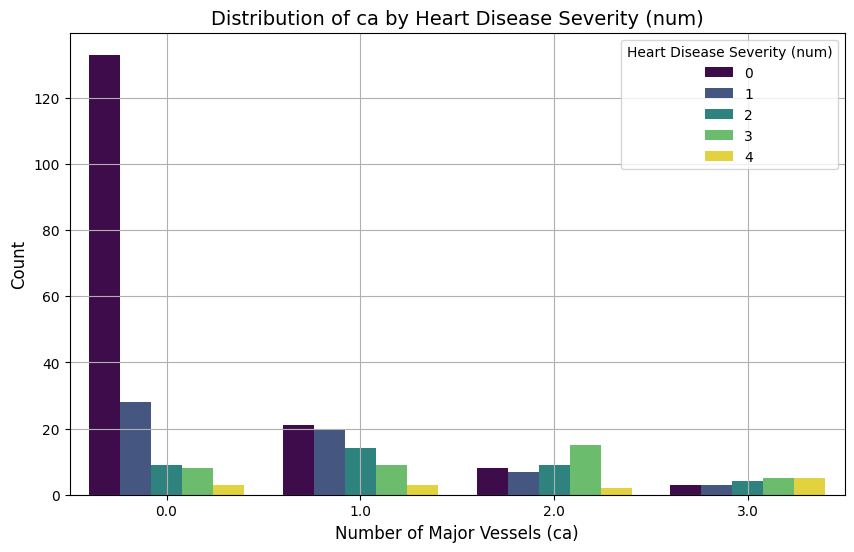

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ca', hue='num', data=df, palette='viridis')
plt.title('Distribution of ca by Heart Disease Severity (num)', fontsize=14)
plt.xlabel('Number of Major Vessels (ca)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease Severity (num)')
plt.grid(True)
plt.show()

/tmp/ipykernel_2877025/532727552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='ca', data=df, palette='Set3')


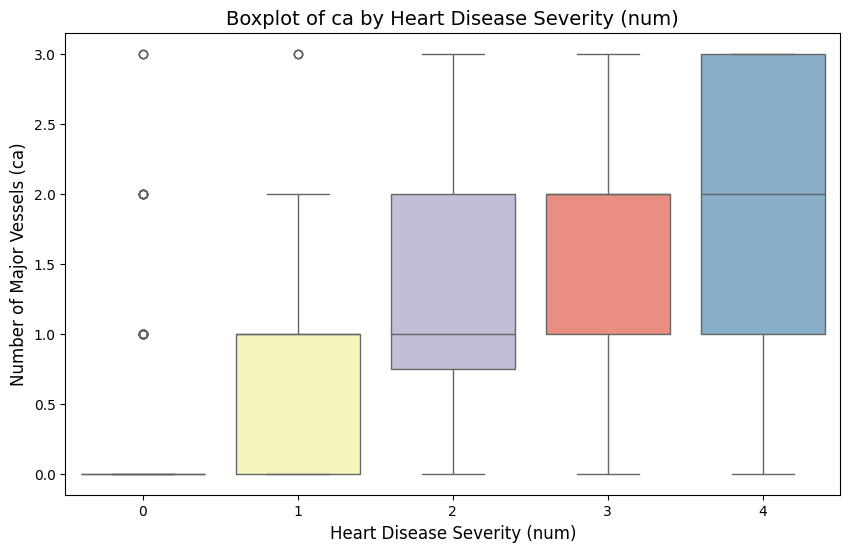

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='ca', data=df, palette='Set3')
plt.title('Boxplot of ca by Heart Disease Severity (num)', fontsize=14)
plt.xlabel('Heart Disease Severity (num)', fontsize=12)
plt.ylabel('Number of Major Vessels (ca)', fontsize=12)
plt.show()

### INFERENCE
* clear trend, as num major vessels increases, severity increases.
* Since there is a large number of missing values in this section and also it is an important feature, we can use "Group-Based Imputation" but we risk leakage of num related details into dataframe, we can also use regression.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

### Feature chol:  (serum cholesterol in mg/dl)
* missing values: 920-890=30

In [106]:
print(df['chol'].dtype)

float64


In [107]:
print(df['chol'].isnull().sum())

30


In [108]:
correlation = df[['chol', 'num']].corr()
print(correlation)

          chol       num
chol  1.000000 -0.231547
num  -0.231547  1.000000


/tmp/ipykernel_2877025/1197279254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='chol', data=df, palette='Set3')


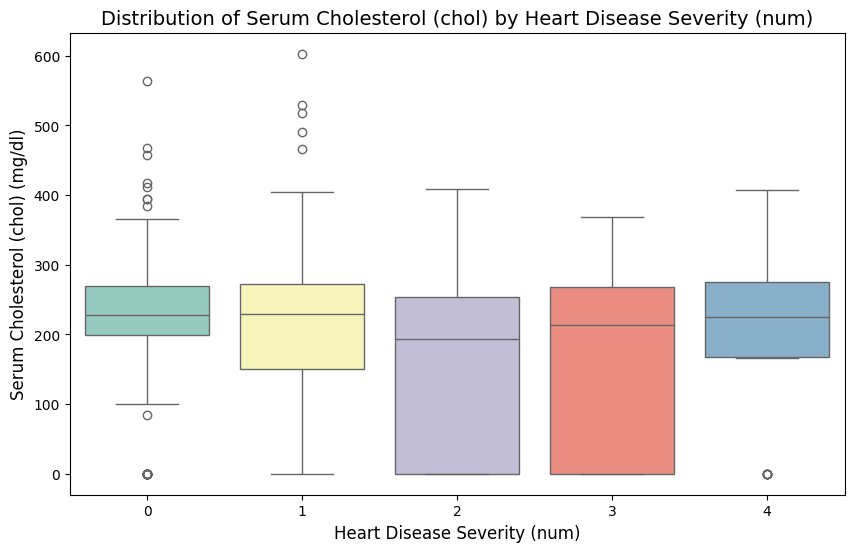

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='chol', data=df, palette='Set3')
plt.title('Distribution of Serum Cholesterol (chol) by Heart Disease Severity (num)', fontsize=14)
plt.xlabel('Heart Disease Severity (num)', fontsize=12)
plt.ylabel('Serum Cholesterol (chol) (mg/dl)', fontsize=12)
plt.show()

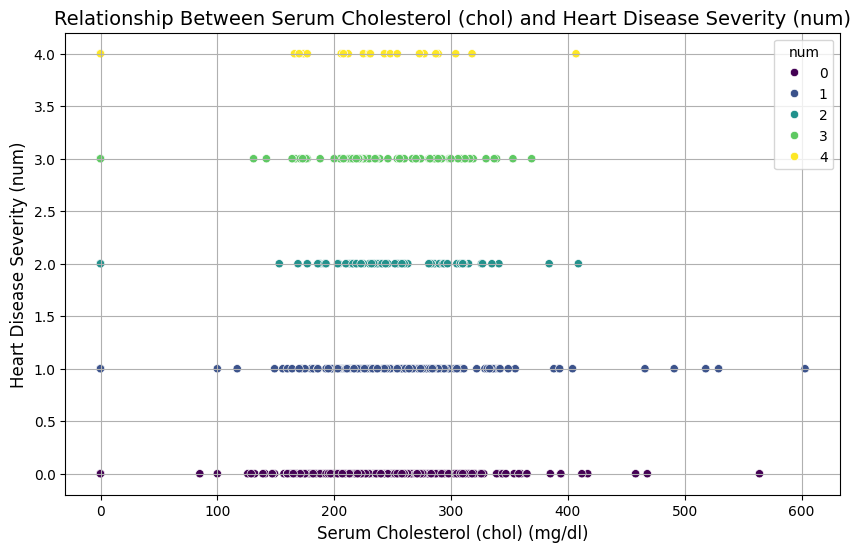

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='num', hue='num', data=df, palette='viridis')
plt.title('Relationship Between Serum Cholesterol (chol) and Heart Disease Severity (num)', fontsize=14)
plt.xlabel('Serum Cholesterol (chol) (mg/dl)', fontsize=12)
plt.ylabel('Heart Disease Severity (num)', fontsize=12)
plt.grid(True)
plt.show()

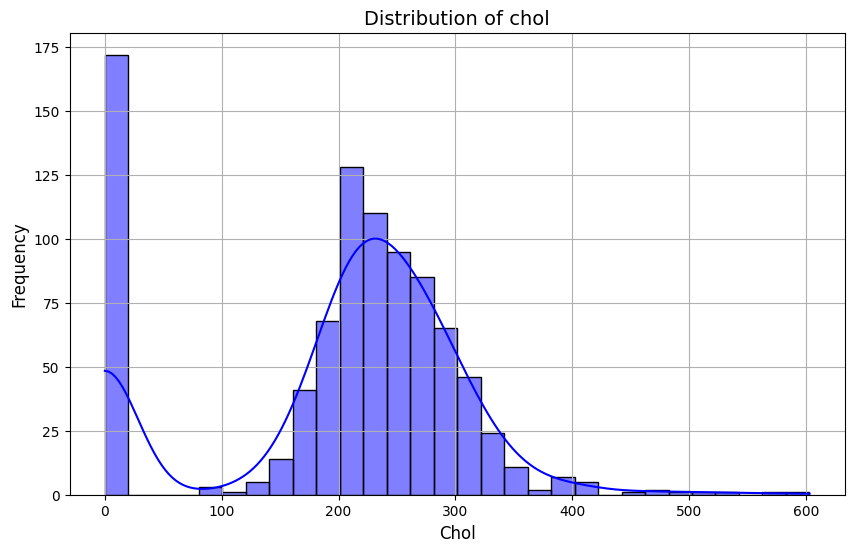

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], bins=30, kde=True, color='blue')
plt.title('Distribution of chol', fontsize=14)
plt.xlabel('Chol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

Since not very large number of missing values of "chol" i will simply use median imputation as it is simple and robust way.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

Now we need to make predictions or make group based imputation or drop the cloumn entirely based on the it importance.
* list of features to handle:
  * trestbps 
  * chol: after splitting data into train test and validate add missing values to avoid leakage 
  * thalch
  * oldpeak: after splitting the data use group-based imputation, It retains important relationships, avoids leakage, and aligns with the goal of accurately predicting heart disease severity.
  * slope
  * ca
  * thal

**trestbps**
* We use Median Imputation to fill the missing values because:
  * the dataset is not heavily skewed (seen during above EDA), but using medians ensure outliers do not have much effect on values.
  * simple snd since only 59 values are missing it is robust.

In [113]:
median_trestbps = df['trestbps'].median()
df['trestbps'].fillna(median_trestbps, inplace=True)

/tmp/ipykernel_2877025/3015013425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(median_trestbps, inplace=True)


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  920 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    865 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

**thalch** maximum heart rate achieved

In [115]:
print(df['thalch'].dtype)

float64


In [116]:
print(df['thalch'].isnull().sum())

55


/tmp/ipykernel_2877025/849020439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='thalch', data=df, palette='Set3')


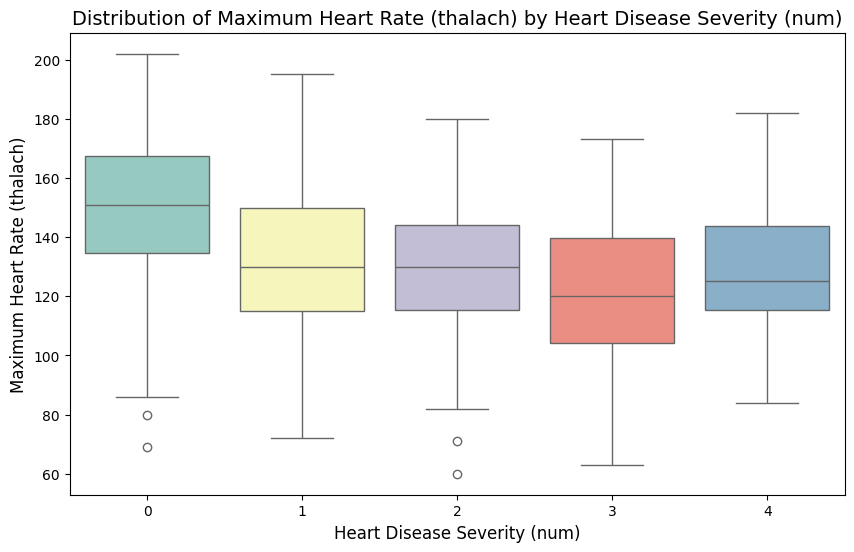

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='thalch', data=df, palette='Set3')
plt.title('Distribution of Maximum Heart Rate (thalach) by Heart Disease Severity (num)', fontsize=14)
plt.xlabel('Heart Disease Severity (num)', fontsize=12)
plt.ylabel('Maximum Heart Rate (thalach)', fontsize=12)
plt.show()

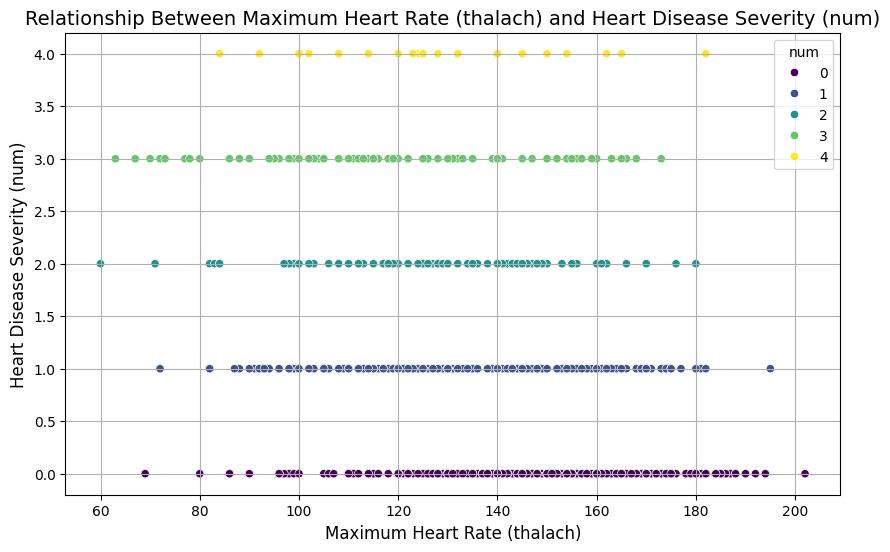

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thalch', y='num', hue='num', data=df, palette='viridis')
plt.title('Relationship Between Maximum Heart Rate (thalach) and Heart Disease Severity (num)', fontsize=14)
plt.xlabel('Maximum Heart Rate (thalach)', fontsize=12)
plt.ylabel('Heart Disease Severity (num)', fontsize=12)
plt.grid(True)
plt.show()

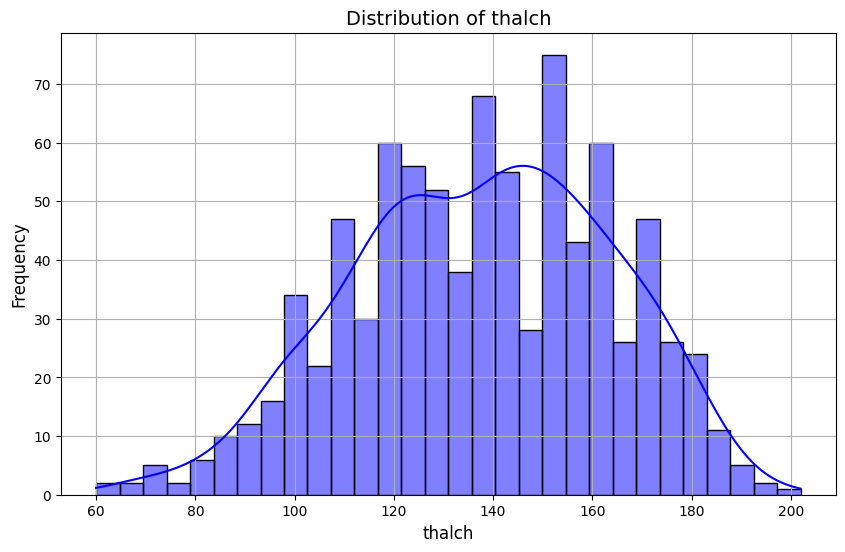

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df['thalch'], bins=30, kde=True, color='blue')
plt.title('Distribution of thalch', fontsize=14)
plt.xlabel('thalch', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [120]:
print(df[['thalch', 'age', 'trestbps', 'oldpeak']].corr())


            thalch       age  trestbps   oldpeak
thalch    1.000000 -0.365778 -0.104182 -0.151174
age      -0.365778  1.000000  0.230784  0.258243
trestbps -0.104182  0.230784  1.000000  0.160715
oldpeak  -0.151174  0.258243  0.160715  1.000000


In [121]:
#fill nan values with median
median_thalch = df['thalch'].median()
df['thalch'].fillna(median_thalch, inplace=True)

/tmp/ipykernel_2877025/2402402031.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thalch'].fillna(median_thalch, inplace=True)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  920 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    920 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

**chol**(serum cholesterol in mg/dl)

In [123]:
print(df['chol'].isnull().sum())

30


In [124]:
median_chol = df['chol'].median()
df['chol'].fillna(median_chol, inplace=True)

/tmp/ipykernel_2877025/2981585512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(median_chol, inplace=True)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  920 non-null    float64
 4   chol                      920 non-null    float64
 5   fbs                       920 non-null    int64  
 6   thalch                    920 non-null    float64
 7   exang                     920 non-null    int64  
 8   oldpeak                   858 non-null    float64
 9   slope                     611 non-null    object 
 10  ca                        309 non-null    float64
 11  thal                      434 non-null    object 
 12  num                       920 non-null    int64  
 13  cp_asymptomatic           920 non-null    int64  
 14  cp_atypica

**oldpeak**(serum cholesterol in mg/dl)

In [126]:
print(df['oldpeak'].isnull().sum())

62


In [127]:
df.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,1,63,0,145.0,233.0,1,150.0,0,2.3,downsloping,0.0,fixed defect,0,0,0,0,1,1,0,0
1,2,67,0,160.0,286.0,0,108.0,1,1.5,flat,3.0,normal,2,1,0,0,0,1,0,0
2,3,67,0,120.0,229.0,0,129.0,1,2.6,flat,2.0,reversable defect,1,1,0,0,0,1,0,0
3,4,37,0,130.0,250.0,0,187.0,0,3.5,downsloping,0.0,normal,0,0,0,1,0,0,1,0
4,5,41,1,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,0,0,1,0,0,1,0,0


**id** not relevant to our project hence dropping

In [128]:
df.drop(columns=['id'], inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   858 non-null    float64
 8   slope                     611 non-null    object 
 9   ca                        309 non-null    float64
 10  thal                      434 non-null    object 
 11  num                       920 non-null    int64  
 12  cp_asymptomatic           920 non-null    int64  
 13  cp_atypical angina        920 non-null    int64  
 14  cp_non-ang

### Prediction based filling of missing values
Now that almost all columns are complete we handle features for which separate predictions will be needed to fill the missing values.
Columns to handle: oldpeak,slopw, ca, thal.
Why prediction to fill?  
Because these features have large number of missing values therefore we need to fill values keeping in mind the correlation with other features.  


In [130]:
#save current data
# Save the modified dataset to a CSV file
df.to_csv('heart_disease_modified.csv', index=False)

In [131]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63,0,145.0,233.0,1,150.0,0,2.3,downsloping,0.0,fixed defect,0,0,0,0,1,1,0,0
1,67,0,160.0,286.0,0,108.0,1,1.5,flat,3.0,normal,2,1,0,0,0,1,0,0
2,67,0,120.0,229.0,0,129.0,1,2.6,flat,2.0,reversable defect,1,1,0,0,0,1,0,0
3,37,0,130.0,250.0,0,187.0,0,3.5,downsloping,0.0,normal,0,0,0,1,0,0,1,0
4,41,1,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,0,0,1,0,0,1,0,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   858 non-null    float64
 8   slope                     611 non-null    object 
 9   ca                        309 non-null    float64
 10  thal                      434 non-null    object 
 11  num                       920 non-null    int64  
 12  cp_asymptomatic           920 non-null    int64  
 13  cp_atypical angina        920 non-null    int64  
 14  cp_non-ang

Split the dataset into tran,test and validate before imputing values to avoid data leakage.

In [133]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
train_df_Predictions_to_fill, temp_df_Predictions_to_fill = train_test_split(df, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
val_df_Predictions_to_fill, test_df_Predictions_to_fill = train_test_split(temp_df_Predictions_to_fill, test_size=0.5, random_state=42)

# Verify the sizes
print(f"Training Set: {train_df_Predictions_to_fill.shape}")
print(f"Validation Set: {val_df_Predictions_to_fill.shape}")
print(f"Test Set: {test_df_Predictions_to_fill.shape}")

Training Set: (644, 19)
Validation Set: (138, 19)
Test Set: (138, 19)


**Oldpeak**

In [134]:
# separate rows with null values in oldpeaak
train_not_null_oldpeak = train_df_Predictions_to_fill[train_df_Predictions_to_fill['oldpeak'].notnull()]
train_missing_oldpeak = train_df_Predictions_to_fill[train_df_Predictions_to_fill['oldpeak'].isnull()]

In [135]:
from sklearn.linear_model import LinearRegression
predictors = ['age', 'thalch', 'trestbps', 'num', 'chol']  
target = 'oldpeak'

In [136]:
#train and fit
lr_oldpeak = LinearRegression()
lr_oldpeak.fit(train_not_null_oldpeak[predictors], train_not_null_oldpeak[target])


LinearRegression()

In [137]:
#train predict
# Predict and fill missing values for 'oldpeak' in training set
train_df_Predictions_to_fill.loc[train_df_Predictions_to_fill['oldpeak'].isnull(), 'oldpeak'] = lr_oldpeak.predict(train_missing_oldpeak[predictors])

In [138]:
print(train_df_Predictions_to_fill['oldpeak'].isnull().sum())

0


In [139]:
#compare stats to confirm correctness of predicted val
print("Oldpeak Summary (Before Imputation):")
print(train_not_null_oldpeak['oldpeak'].describe())

Oldpeak Summary (Before Imputation):
count    606.000000
mean       0.890759
std        1.116361
min       -2.600000
25%        0.000000
50%        0.550000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


In [140]:
print("\nOldpeak Summary (After Imputation):")
print(train_df_Predictions_to_fill['oldpeak'].describe())


Oldpeak Summary (After Imputation):
count    644.000000
mean       0.896431
std        1.093138
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.508228
max        6.200000
Name: oldpeak, dtype: float64


**About the predicted values for oldpeak**. 
* The above computed summary reflects consistency. meaning, mean, percentiles,and range remain almost unchanged. GOOD!
* Predicted values are in alinment with the original dataset. 

In [141]:
#fill val set and test set
if val_df_Predictions_to_fill['oldpeak'].isnull().sum() > 0:
    val_missing = val_df_Predictions_to_fill[val_df_Predictions_to_fill['oldpeak'].isnull()]
    val_df_Predictions_to_fill.loc[val_df_Predictions_to_fill['oldpeak'].isnull(), 'oldpeak'] = lr_oldpeak.predict(val_missing[predictors])

# Predict and fill missing values in the test set
if test_df_Predictions_to_fill['oldpeak'].isnull().sum() > 0:
    test_missing = test_df_Predictions_to_fill[test_df_Predictions_to_fill['oldpeak'].isnull()]
    test_df_Predictions_to_fill.loc[test_df_Predictions_to_fill['oldpeak'].isnull(), 'oldpeak'] = lr_oldpeak.predict(test_missing[predictors])


In [142]:
#combine the filled data with main dataframe
combined_df = pd.concat([train_df_Predictions_to_fill, val_df_Predictions_to_fill, test_df_Predictions_to_fill])


In [143]:
 combined_df['oldpeak'].isnull().sum()

np.int64(0)

In [144]:
combined_df.shape

(920, 19)

In [145]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 363 to 428
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   slope                     611 non-null    object 
 9   ca                        309 non-null    float64
 10  thal                      434 non-null    object 
 11  num                       920 non-null    int64  
 12  cp_asymptomatic           920 non-null    int64  
 13  cp_atypical angina        920 non-null    int64  
 14  cp_non-angina

In [146]:
#save the dataset 
combined_df.to_csv('heart_disease_final_modified_filled_with_oldpeak.csv', index=False)

In [168]:
modified_df= pd.read_csv('heart_disease_final_modified_filled_with_oldpeak.csv')
modified_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,43,1,120.0,201.0,0,165.0,0,0.0,NaN,NaN,NaN,0,0,1,0,0,0,1,0
1,59,1,130.0,188.0,0,124.0,0,1.0,flat,NaN,NaN,0,0,1,0,0,0,1,0
2,55,0,120.0,0.0,0,92.0,0,0.3,upsloping,NaN,reversable defect,4,1,0,0,0,0,0,1
3,59,0,130.0,318.0,0,120.0,1,1.0,flat,NaN,normal,0,0,0,1,0,0,1,0
4,42,1,115.0,211.0,0,137.0,0,0.0,NaN,NaN,NaN,0,0,0,1,0,0,0,1


In [169]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   slope                     611 non-null    object 
 9   ca                        309 non-null    float64
 10  thal                      434 non-null    object 
 11  num                       920 non-null    int64  
 12  cp_asymptomatic           920 non-null    int64  
 13  cp_atypical angina        920 non-null    int64  
 14  cp_non-ang

### **slope**: Missing values=309

In [170]:
print(modified_df['slope'].dtype)

object


In [171]:
modified_df['slope'].unique()

array([nan, 'flat', 'upsloping', 'downsloping'], dtype=object)

In [172]:
print(modified_df['slope'].describe())

count      611
unique       3
top       flat
freq       345
Name: slope, dtype: object


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode using label because data has a ordinal relationship
label_encoder = LabelEncoder()
modified_df['slope'] = label_encoder.fit_transform(modified_df['slope'].astype(str))
print("Encoded slope values:", modified_df['slope'].unique())


Encoded slope values: [2 1 3 0]


In [159]:
#spli dataset test train val
train_df, temp_df = train_test_split(modified_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [160]:
#now we do the group-based imputation why? because slope and num have strong feature relationship
slope_mode_by_num = train_df.groupby('num')['slope'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

We youe mode why?
because slope has clear relationship with num donsloing is associated with high num ; upsloping with low num values

In [161]:
#now fill missing vals
def fill_encoded_slope_with_group_mode(df, slope_mode_by_num):
    for num_value, mode_slope in slope_mode_by_num.items():
        df.loc[(df['slope'].isnull()) & (df['num'] == num_value), 'slope'] = mode_slope
    return df

In [163]:
#fill missing in train,
train_df = fill_encoded_slope_with_group_mode(train_df, slope_mode_by_num)
print(train_df['slope'].describe())


count    644.000000
mean       1.757764
std        0.897734
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: slope, dtype: float64


In [ ]:
val_df = fill_encoded_slope_with_group_mode(val_df, slope_mode_by_num)
test_df = fill_encoded_slope_with_group_mode(test_df, slope_mode_by_num)

In [175]:
train_df['slope'] = train_df['slope'].astype(int)
val_df['slope'] = val_df['slope'].astype(int)
test_df['slope'] = test_df['slope'].astype(int)

In [176]:
print("Missing values in train:", train_df['slope_encoded'].isnull().sum())
print("Missing values in val:", val_df['slope_encoded'].isnull().sum())
print("Missing values in test:", test_df['slope_encoded'].isnull().sum())
print("Data type of 'slope_encoded':", train_df['slope_encoded'].dtype)

Missing values in train: 0
Missing values in val: 0
Missing values in test: 0
Data type of 'slope_encoded': int64


In [178]:
#finally combine 
combined_df = pd.concat([train_df, val_df, test_df])

In [179]:
 combined_df['slope'].isnull().sum()

np.int64(0)

In [180]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 363 to 428
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   slope                     920 non-null    int64  
 9   ca                        309 non-null    float64
 10  thal                      434 non-null    object 
 11  num                       920 non-null    int64  
 12  cp_asymptomatic           920 non-null    int64  
 13  cp_atypical angina        920 non-null    int64  
 14  cp_non-angina

In [183]:
#save the dataset 
combined_df.to_csv('heart_disease_final_modified_filled_with_oldpeak_slope.csv', index=False)

In [184]:
modified_df= pd.read_csv('heart_disease_final_modified_filled_with_oldpeak_slope.csv')
modified_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_encoded
0,60,1,150.0,240.0,0,171.0,0,0.9,3,0.0,normal,0,0,0,0,1,0,1,0,3
1,62,1,120.0,0.0,0,123.0,1,1.7,0,NaN,NaN,1,1,0,0,0,0,0,1,0
2,42,0,120.0,228.0,0,152.0,1,1.5,1,NaN,NaN,0,0,0,1,0,0,1,0,1
3,58,0,130.0,263.0,0,140.0,1,2.0,1,NaN,NaN,1,1,0,0,0,0,1,0,1
4,54,0,120.0,238.0,0,154.0,0,0.0,2,NaN,NaN,0,0,1,0,0,0,1,0,2


### **ca** ca: number of major vessels (0-3) colored by fluoroscopy; missing values

In [185]:
print(modified_df['ca'].dtype) #already float type no need to encode

float64


In [187]:
#strong relationship with num again
#splitting
train_df, temp_df = train_test_split(modified_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [188]:
train_df.shape

(644, 20)

In [189]:
val_df.shape

(138, 20)

In [190]:
#calculate group mode for ca in training data
group_modes = train_df.groupby('num')['ca'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [191]:
print(group_modes)

num
0    0.0
1    0.0
2    1.0
3    2.0
4    3.0
Name: ca, dtype: float64


In [192]:
##apply to sets
def impute_ca(row, group_modes):
    if pd.isnull(row['ca']):
        return group_modes[row['num']]
    return row['ca']

# Step 4: Apply imputation to all sets using the calculated group modes
train_df['ca'] = train_df.apply(lambda row: impute_ca(row, group_modes), axis=1)
val_df['ca'] = val_df.apply(lambda row: impute_ca(row, group_modes), axis=1)
test_df['ca'] = test_df.apply(lambda row: impute_ca(row, group_modes), axis=1)


In [200]:
train_df['ca'].isnull().sum()

np.int64(0)

In [201]:
val_df['ca'].isnull().sum()

np.int64(0)

In [202]:
#finally combine 
combined_df = pd.concat([train_df, val_df, test_df])

In [203]:
 combined_df['ca'].isnull().sum()

np.int64(0)

In [204]:
combined_df.to_csv('heart_disease_final_modified_filled_with_oldpeak_slope_ca.csv', index=False)

In [264]:
modified_df= pd.read_csv('heart_disease_final_modified_filled_with_oldpeak_slope_ca.csv')
modified_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_encoded
0,74,0,130.0,0.0,0,140.0,0,0.326473,2,0.0,NaN,0,0,0,1,0,0,1,0,2
1,68,0,135.0,0.0,0,120.0,1,0.000000,3,2.0,reversable defect,3,1,0,0,0,0,0,1,3
2,55,0,140.0,295.0,0,136.0,0,0.000000,2,0.0,NaN,1,0,0,0,1,0,1,0,2
3,43,0,120.0,175.0,0,120.0,1,1.000000,1,0.0,reversable defect,1,1,0,0,0,0,1,0,1
4,53,0,105.0,0.0,0,115.0,0,0.000000,1,0.0,reversable defect,1,0,0,1,0,0,1,0,1


In [265]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   slope                     920 non-null    int64  
 9   ca                        920 non-null    float64
 10  thal                      434 non-null    object 
 11  num                       920 non-null    int64  
 12  cp_asymptomatic           920 non-null    int64  
 13  cp_atypical angina        920 non-null    int64  
 14  cp_non-ang

### Feature: thal thal: [normal; fixed defect; reversible defect]; missing values

In [266]:
print(modified_df['thal'].dtype)

object


In [267]:
modified_df['thal'].unique()

array([nan, 'reversable defect', 'fixed defect', 'normal'], dtype=object)

In [268]:
#one hot encoding
thal_one_hot = pd.get_dummies(modified_df['thal'], prefix='thal', drop_first=False)
thal_one_hot = thal_one_hot.astype(int)

In [269]:
# Combine one-hot encoded columns with the original dataset
modified_df = pd.concat([modified_df, thal_one_hot], axis=1)
# Drop the original 'thal' column (optional)
modified_df.drop(columns=['thal'], inplace=True)
modified_df.head()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   slope                     920 non-null    int64  
 9   ca                        920 non-null    float64
 10  num                       920 non-null    int64  
 11  cp_asymptomatic           920 non-null    int64  
 12  cp_atypical angina        920 non-null    int64  
 13  cp_non-anginal            920 non-null    int64  
 14  cp_typical

In [271]:
modified_df.drop(columns=['thal_fixed defect','thal_normal','thal_reversable defect'], inplace=True)

In [273]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   slope                     920 non-null    int64  
 9   ca                        920 non-null    float64
 10  num                       920 non-null    int64  
 11  cp_asymptomatic           920 non-null    int64  
 12  cp_atypical angina        920 non-null    int64  
 13  cp_non-anginal            920 non-null    int64  
 14  cp_typical

In [246]:
# train_df.shape

(644, 22)

In [245]:
#now split data for thal imputation
# train_df, temp_df = train_test_split(modified_df, test_size=0.3, random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [247]:
# #cal group mode 
# group_modes_thal = train_df.groupby('num')[['thal_fixed defect', 'thal_normal', 'thal_reversable defect']].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# print(group_modes_thal)

     thal_fixed defect  thal_normal  thal_reversable defect
num                                                        
0                    0            0                       0
1                    0            0                       0
2                    0            0                       0
3                    0            0                       0
4                    0            0                       0


In [279]:
modified_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_encoded
0,74,0,130.0,0.0,0,140.0,0,0.326473,2,0.0,0,0,0,1,0,0,1,0,2
1,68,0,135.0,0.0,0,120.0,1,0.000000,3,2.0,3,1,0,0,0,0,0,1,3
2,55,0,140.0,295.0,0,136.0,0,0.000000,2,0.0,1,0,0,0,1,0,1,0,2
3,43,0,120.0,175.0,0,120.0,1,1.000000,1,0.0,1,1,0,0,0,0,1,0,1
4,53,0,105.0,0.0,0,115.0,0,0.000000,1,0.0,1,0,0,1,0,0,1,0,1


In [281]:
# Save the updated dataset to a new CSV file
modified_df.to_csv('heart_disease_For_ANN.csv', index=False)

## Successfully Explored the dataset, made madfications to it with the final goal of ANN in mind and finally saved as a new dataset for final model

## Now using our saved modified dataset implement our final ANN in a separate notebook

# **EXTRA CODE**

In [274]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# #encode slope feature
# label_encoder = LabelEncoder()
# modified_df['slope'] = label_encoder.fit_transform(modified_df['slope'].astype(str))
# modified_df['slope'].unique()

In [275]:
#separate rows with/wthout missiging slope vals
# train_not_null_slope = modified_df[modified_df['slope'].notnull()]
# train_missing_slope = modified_df[modified_df['slope'].isnull()]
# print(train_not_null_slope['slope'].unique())

In [276]:
# predictors = ['age', 'num', 'thalch', 'oldpeak'] 
# target = 'slope'

In [277]:
# #split data
# X = train_not_null_slope[predictors]
# y = train_not_null_slope[target]
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# #train 
# svm_model = SVC(kernel='poly', C=1.0, random_state=42)  
# svm_model.fit(X_train, y_train)

# val_accuracy = svm_model.score(X_val, y_val)
# print(val_accuracy)

In [278]:
# X_train, X_val, y_train, y_val = train_test_split(
#     train_not_null_slope[predictors], train_not_null_slope[target], test_size=0.2, random_state=42
# )

# # train
# log_reg = LogisticRegression(random_state=42, max_iter=1000)
# log_reg.fit(X_train, y_train)

# # Validate the model
# val_accuracy = log_reg.score(X_val, y_val)
# print(val_accuracy)
